# Loss Functions - numpy

Machines learn by means of a loss function. It’s a method of evaluating how well specific algorithm models the given data. If predictions deviates too much from actual results, loss function would cough up a very large number. Gradually, with the help of some optimization function, loss function learns to reduce the error in prediction. In this article we will go through several loss functions and their applications in the domain of machine/deep learning.

There’s no one-size-fits-all loss function to algorithms in machine learning. There are various factors involved in choosing a loss function for specific problem such as type of machine learning algorithm chosen, ease of calculating the derivatives and to some degree the percentage of outliers in the data set.

Broadly, loss functions can be classified into two major categories depending upon the type of learning task we are dealing with — Regression losses and Classification losses. In classification, we are trying to predict output from set of finite categorical values i.e Given large data set of images of hand written digits, categorizing them into one of 0–9 digits. Regression, on the other hand, deals with predicting a continuous value for example given floor area, number of rooms, size of rooms, predict the price of room.

## Regression Losses

### Mean Square Error/Quadratic Loss/L2 Loss

Mathematical formulation

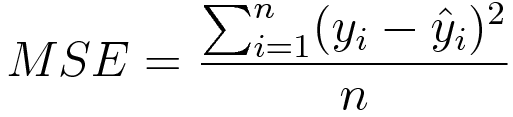

As the name suggests, Mean square error is measured as the average of squared difference between predictions and actual observations. It’s only concerned with the average magnitude of error irrespective of their direction. However, due to squaring, predictions which are far away from actual values are penalized heavily in comparison to less deviated predictions. Plus MSE has nice mathematical properties which makes it easier to calculate gradients.

```python
import numpy as np

y_hat = np.array([0.000, 0.166, 0.333])
y_true = np.array([0.000, 0.254, 0.998])

def rmse(predictions, targets):
    differences = predictions - targets
    differences_squared = differences ** 2
    mean_of_differences_squared = differences_squared.mean()
    rmse_val = np.sqrt(mean_of_differences_squared)
    return rmse_val

print("d is: " + str(["%.8f" % elem for elem in y_hat]))
print("p is: " + str(["%.8f" % elem for elem in y_true]))

rmse_val = rmse(y_hat, y_true)
print("rms error is: " + str(rmse_val))
```


### Mean Absolute Error/L1 Loss

 Mathematical formulation

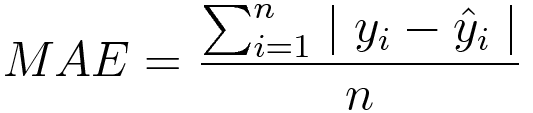

Mean absolute error, on the other hand, is measured as the average of sum of absolute differences between predictions and actual observations. Like MSE, this as well measures the magnitude of error without considering their direction. Unlike MSE, MAE needs more complicated tools such as linear programming to compute the gradients. Plus MAE is more robust to outliers since it does not make use of square.

```python
import numpy as np

y_hat = np.array([0.000, 0.166, 0.333])
y_true = np.array([0.000, 0.254, 0.998])
print("d is: " + str(["%.8f" % elem for elem in y_hat]))
print("p is: " + str(["%.8f" % elem for elem in y_true]))

def mae(predictions, targets):
    differences = predictions - targets
    absolute_differences = np.absolute(differences)
    mean_absolute_differences = absolute_differences.mean()
    return mean_absolute_differences

mae_val = mae(y_hat, y_true)
print ("mae error is: " + str(mae_val))
```

### Mean Bias Error

This is much less common in machine learning domain as compared to it’s counterpart. This is same as MSE with the only difference that we don’t take absolute values. Clearly there’s a need for caution as positive and negative errors could cancel each other out. Although less accurate in practice, it could determine if the model has positive bias or negative bias.

Mathematical formulation

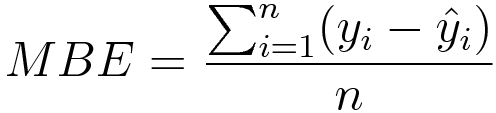

## Classification Losses

### Hinge Loss/Multi class SVM Loss

In simple terms, the score of correct category should be greater than sum of scores of all incorrect categories by some safety margin (usually one). And hence hinge loss is used for maximum-margin classification, most notably for support vector machines. Although not differentiable, it’s a convex function which makes it easy to work with usual convex optimizers used in machine learning domain.

Mathematical formulation

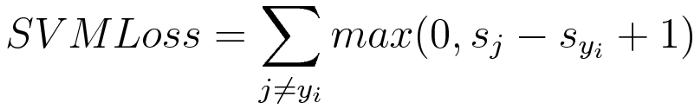

Consider an example where we have three training examples and three classes to predict — Dog, cat and horse. Below the values predicted by our algorithm for each of the classes

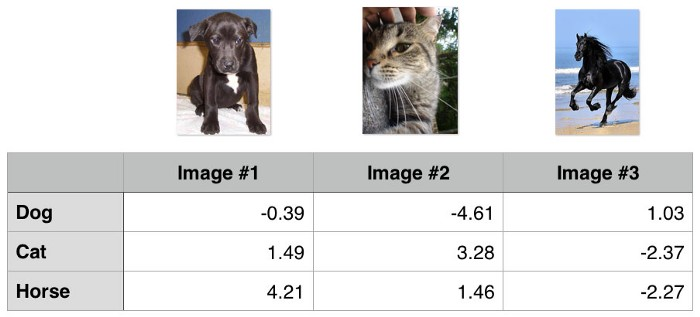

Computing hinge losses for all 3 training examples

```
## 1st training example 
max(0, (1.49) - (-0.39) + 1) + max(0, (4.21) - (-0.39) + 1)
max(0, 2.88) + max(0, 5.6)
2.88 + 5.6
8.48 (High loss as very wrong prediction)

## 2nd training example
max(0, (-4.61) - (3.28)+ 1) + max(0, (1.46) - (3.28)+ 1)
max(0, -6.89) + max(0, -0.82)
0 + 0
0 (Zero loss as correct prediction)

## 3rd training example
max(0, (1.03) - (-2.27)+ 1) + max(0, (-2.37) - (-2.27)+ 1)
max(0, 4.3) + max(0, 0.9)
4.3 + 0.9
5.2 (High loss as very wrong prediction)
```

### Cross Entropy Loss/Negative Log Likelihood

This is the most common setting for classification problems. Cross-entropy loss increases as the predicted probability diverges from the actual label.

Mathematical formulation

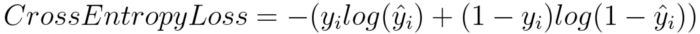

Notice that when actual label is 1 (y(i) = 1), second half of function disappears whereas in case actual label is 0 (y(i) = 0) first half is dropped off. In short, we are just multiplying the log of the actual predicted probability for the ground truth class. An important aspect of this is that cross entropy loss penalizes heavily the predictions that are confident but wrong.


```python
import numpy as np

predictions = np.array([[0.25,0.25,0.25,0.25],
                        [0.01,0.01,0.01,0.96]])
targets = np.array([[0,0,0,1],
                    [0,0,0,1]])

def cross_entropy(predictions, targets, epsilon=1e-10):
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    N = predictions.shape[0]
    ce_loss = -np.sum(np.sum(targets * np.log(predictions + 1e-5)))/N
    return ce_loss

cross_entropy_loss = cross_entropy(predictions, targets)
print ("Cross entropy loss is: " + str(cross_entropy_loss))
```






# Hàm loss - Numpy

   Máy học bằng phương pháp dùng hàm mất mát(loss). Nó là một phương pháp đánh giá một giải thuật đưa ra tốt đến cỡ nào trong việc mô hình hóa dữ liệu đã cho. Nếu kết quả dự đoán sai lệch quá nhiều so với kết quả thực tế, hàm loss sẽ tạo ra một con số rất lớn. Dần dần, với sự trợ giúp của hàm optimization. Hàm loss học cách giảm lỗi trong việc tiên đoán. Trong bài viết này, chúng tôi sẽ đi qua một số hàm loss và các ứng dụng của chúng trong lĩnh vực máy học và học sâu. Không có hàm loss phù hợp với tất cả các thuật toán trong máy học. Có nhiều yếu tố khác nhau liên quan đến việc chọn hàm loss cho vấn đề cụ thể chẳng hạn như loại thuật toán máy học được chọn, sự dễ dàng tính toán các đạo hàm và ở một mức độ nào đó tỷ lệ phần trăm của các ngoại lệ trong tập dữ liệu...
   
   Nói chung, các hàm mất có thể được phân thành hai loại chính tùy thuộc vào loại nhiệm vụ học mà chúng ta đang xử lý - mất mát hồi quy (Regression losses) và mất mát phân loại (Classification losses). Trong phân loại, chúng tôi đang cố gắng dự đoán đầu ra từ tập hợp các dữ liệu phân loại hữu hạnliệuu đầu vào, ví dụ : cho tập dữ liệu lớn hình ảnh của các chữ số viết tay, phân loại chúng thành một trong chữ số từ 0-9 . Mặt khác, hồi quy liên quan đến việc dự đoán giá trị liên tục, ví dụ diện tích sàn, số phòng, kích thước phòng, dự đoán giá phòng.


## I. Hàm mất mát hồi quy (Regression Losses)
### 1. Mean Square Error (sai số toàn phương trung bình) / Quadratic Loss(Hồi Quy Bậc Hai) / L2 Loss

Công thức :

# $MSE = \frac{\sum_{i=1}^{n}\left ( y - \hat{y}i \right )2}{n}$

Như trên cho thấy, sai số bình phương trung bình được đo bằng trung bình chênh lệch bình phương giữa các dự đoán và quan sát thực tế. Nó chỉ quan tâm đến độ lớn trung bình của lổi không phân biệt hướng của chúng. Tuy nhiên, do bình phương, các dự đoán khác xa với các giá trị thực tế rất nhiều so với các dự đoán ít sai lệch khác. Nhưng, cộng vào đó, MSE có các thuộc tính toán học tốt giúp tính toán độ dốc dễ dàng hơn.


In [35]:
# Ví dụ 1 : tính mse 
    
import numpy as np

y_hat = np.array([0.000, 0.166, 0.333])
y_true = np.array([0.000, 0.254, 0.998])

def rmse(predictions, targets):
    differences = predictions - targets 
    differences_squared = differences ** 2
    mean_of_differences_squared = differences_squared.mean()
    rmse_val = np.sqrt(mean_of_differences_squared)
    return rmse_val

print("d is: " + str(["%.8f" % elem for elem in y_hat]))
print("p is: " + str(["%.8f" % elem for elem in y_true]))

rmse_val = rmse(y_hat, y_true)
print("rms error is: " + str(rmse_val))

d is: ['0.00000000', '0.16600000', '0.33300000']
p is: ['0.00000000', '0.25400000', '0.99800000']
rms error is: 0.3872849941150143


Ví dụ 2 : Tìm sai số bình phương trung bình cho tập hợp các giá trị sau: (43,41), (44,45), (45,49), (46,47), (47,44).

Các bước chung để tính sai số bình phương trung bình từ một tập hợp các giá trị X và Y: 
- Tìm đường hồi quy. 
- Chèn các giá trị X của bạn vào phương trình hồi quy tuyến tính để tìm các giá trị Y mới (Y").
- Trừ giá trị Y mới từ bản gốc để nhận lỗi. 
- Bình phương các lỗi. Thêm các lỗi. Tìm giá trị trung bình.

Bước 1: Tìm đường hồi quy. Sử dụng <a href="http://www.alcula.com/calculators/statistics/linear-regression/">link này </a> và có dòng hồi quy y = 9.2 + 0.8x.
Bước 2: Tìm giá trị Y" mới
9.2 + 0.8(43) = 43.6
9.2 + 0.8(44) = 44.4
9.2 + 0.8(45) = 45.2
9.2 + 0.8(46) = 46
9.2 + 0.8(47) = 46.8
Bước 3 : Tìm sai số (Y-Y")
41 – 43.6 = -2.6
45 – 44.4 = 0.6
49 – 45.2 = 3.8
47 – 46 = 1
44 – 46.8 = -2.8
Bước 4 : Bình phương sai số
(-2.6)^2 = 6.76
(0.6)^2 = 0.36
(3.8)^2 = 14.44
1^2 = 1
(-2.8)^2 = 7.84

<img src="mean-squared-error-MSE_VD2.png" width="600">

Bước 5: Tổng cac sai số binh phương : 6.76 + 0.36 + 14.44 + 1 + 7.84 = 30.4

Bước 6: sai số bình phương trung bình : 30.4 / 5 = 6.08




## 2. Sai số tuyệt đối trung bình (Mean Absolute Error/L1 Loss)

Công thức :

# $ MAE = \frac{\sum_{i=1}^{n}\left |y - \hat{y}i \right |}{n} $

Sai số tuyệt đối trung bình được tính bằng trung bình tổng của sự sai khác tuyệt đối giữa các trị dự đoán và các giá trị quan sát thực tế. Giống như MSE, nó cũng tính toán độ lớn của lỗi mà không xem xét hướng của chúng. Không giống như MSE, MAE cần các công cụ phức tạp hơn như lập trình tuyến tính để tính toán độ dốc. Thêm vào đó, MAE mạnh hơn đối với các ngoại lệ vì nó không sử dụng bình phương.



In [8]:
# Ví dụ : tính mae 

import numpy as np

y_hat = np.array([0.000, 0.166, 0.333])
y_true = np.array([0.000, 0.254, 0.998])
print("d is: " + str(["%.8f" % elem for elem in y_hat]))
print("p is: " + str(["%.8f" % elem for elem in y_true]))

def mae(predictions, targets):
    differences = predictions - targets
    absolute_differences = np.absolute(differences)
    mean_absolute_differences = absolute_differences.mean()
    return mean_absolute_differences

mae_val = mae(y_hat, y_true)
print ("mae error is: " + str(mae_val))

    

d is: ['0.00000000', '0.16600000', '0.33300000']
p is: ['0.00000000', '0.25400000', '0.99800000']
mae error is: 0.251


Ví dụ 2 : Cách tính sai số tuyệt đối trung bình bằng mô hình dự đoán giá vốn của các ngôi nhà với các kích cỡ khác nhau.

Chi phí thực tế của nhà ở trong ví dụ này :
2 phòng ngủ - $ 200K 
3 phòng ngủ - $ 300K 
4 phòng ngủ - $ 400K 
5 phòng ngủ - $ 500K
Chi phí dự đoán - giả định chi phí nhà ở trong ví dụ này :
2 phòng ngủ - $ 230K 
3 phòng ngủ - $ 290K 
4 phòng ngủ - $ 740K 
5 phòng ngủ - $ 450K
Sai số trung binh : mae = |200 - 230 | + |300 - 290 | + |400-740| + |500 -450| / 4 = $107.5K



### 3. Sai số độ lệch trung bình (Mean Bias Error)

Công thứa này ít phổ biến trong lĩnh vực máy học so với các cộng thức ở trên. Nó giống như MSE với sự khác biệt duy nhất là chúng ta không lấy giá trị tuyệt đối. Rõ ràng có một sự cần thiết phải thận trọng vì các lỗi dương và âm có thể triệt tiêu lẫn nhau. Mặc dù nó ít chính xác hơn trong thực tế, nó có thể xác định xem mô hình có sai lệch dương hay âm hay không.

Công thức :

# $ MBE = \frac{\sum_{i=1}^{n}\left (y - \hat{y}i \right )}{n} $


## II. Hàm mất mát phân loại (Classification Losses)

### 1. Hinge Loss (hàm mất mát bản lề) / Multi class SVM Loss

Trong máy học, hàm mất mát bản lề là hàm mất mát được sử dụng để huấn luyện các bộ phân loại.
Nói một cách đơn giản, điểm số của mẫu đúng phải lớn hơn tổng số điểm của tất cả các mẫu không chính xác theo một số giới hạn an toàn (thường là một). Và do đó, hàm mất mát bản lề được sử dụng để phân loại biên lề tối đa, hầu như được dùng là cho các mô hình SVM (support vector machines - là các mô hình học có giám sát với các thuật toán học liên quan để phân tích dữ liệu được sử dụng để phân loại và phân tích hồi quy). Mặc dù không khác biệt, nhưng nó có chức năng lồi giúp dễ dàng làm việc với các bộ tối ưu lồi thông thường được sử dụng trong lĩnh vực máy học.

Công thức :

# $ SVM Loss = \sum_{j\neq yi}^{ } max(0,s_{j} -s_{yi} +1 )  $

Ví dụ : Hãy xem xét một ví dụ có 3 mẫu dữ liệu huấn luyện và ba lớp để dự đoán - Chó, mèo và ngựa. Phía dưới là các giá trị được dự đoán bởi thuật toán của chúng tôi cho từng lớp 

<img src="HingeLoss.jpeg">

Tính toán hàm mất mát biên lề cho cả 3 mẫu huấn luyện :

#### 1st training example 
max(0, (1.49) - (-0.39) + 1) + max(0, (4.21) - (-0.39) + 1)

max(0, 2.88) + max(0, 5.6)

2.88 + 5.6

8.48 (Giá trị lớn chỉ ra sự tiên đoán rất sai)

#### 2nd training example
max(0, (-4.61) - (3.28)+ 1) + max(0, (1.46) - (3.28)+ 1)

max(0, -6.89) + max(0, -0.82)

0 + 0

0 () tức tiên đoán chích xác )

#### 3rd training example
max(0, (1.03) - (-2.27)+ 1) + max(0, (-2.37) - (-2.27)+ 1)

max(0, 4.3) + max(0, 0.9)

4.3 + 0.9

5.2 (Giá trị lớn chỉ ra sự tiên đoán rất sai)


### 2. Cross Entropy Loss/Negative Log Likelihood

Hàm cross entropy loss(log loss) dùng đo lường hiệu suất của mô hình phân loại cho đầu ra là giá trị xác suất trong khoảng từ 0 đến 1. Hàm tăng khi xác suất dự đoán tách khỏi nhãn thực tế. Một mô hình hoàn hảo có log loss bằng 0. Hàm này là được sử dụng phổ biến nhất cho các vấn đề về phân loại. 


Công thức :

# $CrossEntropyLoss = -(y_{i}log(\hat{y}i)) + (1-y_{i})log(1- \hat{y}i)) $

Lưu ý rằng khi nhãn thực tế là 1 thì (y (i) = 1), nửa vế sau của hàm sẽ biến mất. 
Trong khi trường hợp nhãn thực tế là 0 (thì y (i) = 0) thì nửa vế đầu bị bỏ đi.



In [36]:
# Ví dụ : 

import numpy as np

predictions = np.array([[0.25,0.25,0.25,0.25],
                        [0.01,0.01,0.01,0.96]])
targets = np.array([[0,0,0,1],
                    [0,0,0,1]])

def cross_entropy(predictions, targets, epsilon=1e-10):
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    N = predictions.shape[0]
    ce_loss = -np.sum(np.sum(targets * np.log(predictions + 1e-5)))/N
    return ce_loss

cross_entropy_loss = cross_entropy(predictions, targets)
print ("Cross entropy loss is: " + str(cross_entropy_loss))

Cross entropy loss is: 0.7135329699138555
